____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Elaborado por: Agustin Velazquez__<br/>
__Editado por: Nicolas Aguirre__
____

# Iris Dataset 

## Descripción

Cuantificar la variación morfológica del Iris con las flores de tres especies relacionadas.

El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: lo largo y lo ancho del sépalos y pétalos, en centímetros. Basado en la combinación de estos cuatro rasgos.

https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos

Los datos son:

| Columna | Descripcion |
| --- | --- |
| ID | Unique ID |
| SepalLengthCm | Length of the sepal (cm) |
| SepalWidthCm | Width of the sepal (cm) |
| PetalLengthCm | Length of the petal (cm) |
| PetalWidthCm | Width of the petal (cm) |
| Species | name |

**Objetivo: Clasificar las tres especies de flores segun los datos**

In [3]:
# Importamos algunas de las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [4]:
# Cargamos el dataset
col_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris_df = pd.read_csv('iris.data',names=col_names)
# Observamos una parte de los datos
iris_df.tail(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

In [5]:
# Nuestro objetivo es Species, entonces vemos cuanto tenemos
print("Species")
print(iris_df['Species'].unique())

Species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Pairplot: 

**Con un pairplot podemos visualizar facilmente similitudes y diferencias entre especies utilizando dos caracteristicas**

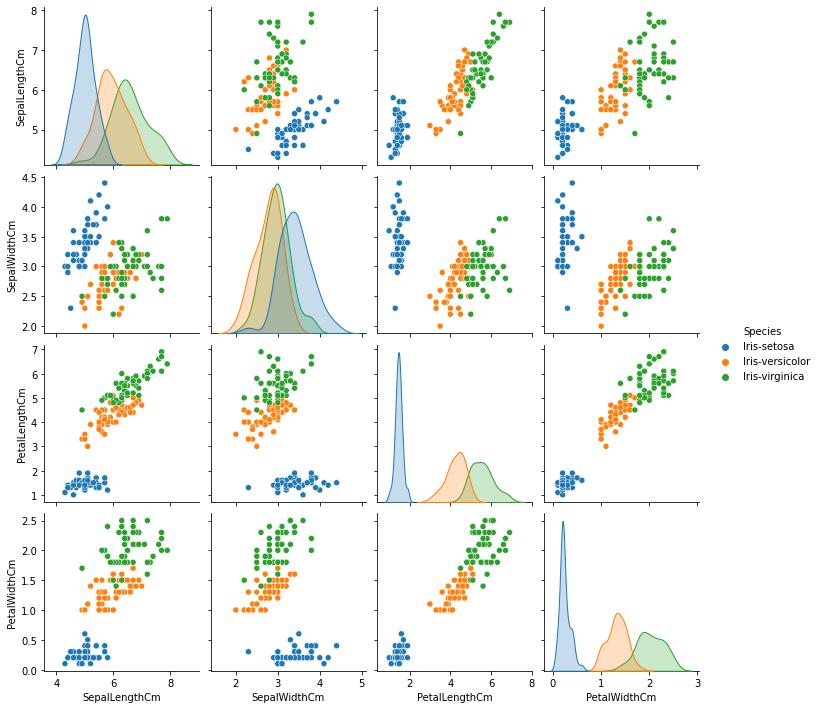

In [6]:
sns.pairplot(data=iris_df, hue='Species')
plt.show()

## Analizando Pairplot

    1. Cual es el significado de los colores?
    2. Que datos podemos extraer de la primer columna del pairplot?
    3. Que otras conclusiones se pueden extraer del resto del pairplot?

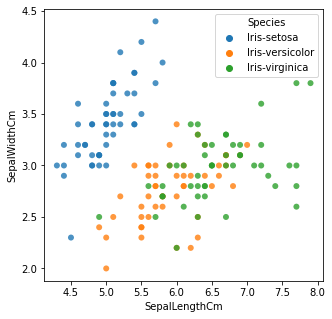

In [7]:
# Un scatter plot para visualizar dos variables
fig, (ax0) = plt.subplots(1,1,figsize=(5,5))
g=sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", data=iris_df, hue = 'Species', 
                  linewidth=0, alpha = 0.8,ax=ax0)
plt.show()

## Multi-Class Problem:

**Hay tres tipos de Especies $\rightarrow$ Multi class problem!**

La estrategia que vamos a utilizar es: One vs One 

![Axis diagram](https://image.slidesharecdn.com/linearmodelsandmulticlassclassification2-170312171304/95/linear-models-and-multiclass-classification-25-638.jpg?cb=1489338888)


La idea es desarrollar un clasificador binario para cada posible par de clases y luego tener un clasificador "ensamblado"

Si un problema es multi-class (n clases) el One vs One va a construir n(n-1)/2. Luego la label va a ser finalizada por el voto de la mayoria. 

Si tenemos tres clases, A, B and C. El OVO va a estar compuesto de  3 (= 3 * (3 - 1) / 2) clasificadores binarios. 
El primero va a clasificar A de B, el segundo A de C, y el tercer B de
C.

Finalmente la muestra x va a tener los siguientes labels, e.j. (A, B, B). y por votacion es asignado la clase perteneciente.


# Pre-Processing

## Features & Target

In [8]:
# Nombre de columnas
column_names = iris_df.columns.values
# Columna target
targets_name = ['Species']
# Nombres de columnas que no estan en el target
features_names = [i_c for i_c in column_names if i_c not in targets_name]
print('Features:',features_names)
print('Target:',targets_name)

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target: ['Species']


In [9]:
# 1) Separamos lo que son las features del target.
features = iris_df[features_names]           
target = iris_df[targets_name]

In [10]:
# Guardamos feature matrix en "X"
X = features.values
# Guardamos target vector in "Y"
Y = target.values                          

In [11]:
print(Y.shape)
print(X.shape)

(150, 1)
(150, 4)


## Label Encoder
**LabelEncoder recibe valores (array o columnas de Pandas DataFrame) y le asigna a cada valor unico una clase.** 

**Luego nos devuelve los valores "codificados" entre 0 y n_clases - 1.**


In [12]:
# Transformamos el label del target en formato numerico para poder procesarlo

# Importamos preprocessing de la libreria scikit-learn (a.k.a. sklearn)
from sklearn import preprocessing

# 1 - Primero creo un objeto (con determinados argumentos) que llama a la funcion que deseo
le = preprocessing.LabelEncoder()

# 2 - AL objeto le aplico la funcion fit a los datos desados 
Y = le.fit_transform(Y.ravel()) #.ravel() para evitar el warning!

# 3 - Agregamos la nueva columna a nuestro DataFrame
iris_df['EncodedSpecies'] = Y

print('Classes:',le.classes_)
print('Response variable after encoding:',Y)
iris_df.tail(10)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Response variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
140            6.7           3.1            5.6           2.4  Iris-virginica   
141            6.9           3.1            5.1           2.3  Iris-virginica   
142            5.8           2.7            5.1           1.9  Iris-virginica   
143            6.8           3.2            5.9           2.3  Iris-virginica   
144            6.7           3.3            5.7           2.5  Iris-virginica   
145            6.7           3.0            5.2           2.3  Iris-virginica   
146            6.3           2.5            5.0           1.9  Iris-virginica   
147            6.5           3.0            5.2           2.0  Iris-virginica   
148            6.2           3.4            5.4           2.3  Iris-virginica   
149            5.9           3.0            5.1           1.8  Iris-virginica   

     EncodedSpecies  
140               2  
141               2  
142               2  
143               2  
144               2  
145               2  
146               2  
147               2  
148               2  
149               2

## Split train & test

In [13]:
# Separar train y test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=4)
#random_state: seed utilizada para poder replicar el experimento ya que la funcion tiene
#componentes aleatorios
#test_size: numero entre 0 y 1 e indicar la proporcion del dataset que va a ser test. 
print(x_train.shape)
print(y_train.shape)

(90, 4)
(90,)


## Scaling

In [14]:
# Auto scaling train-set (mean = 0, std = 1)
scaler = preprocessing.StandardScaler().fit(x_train)
# Los valores de media y var quedan guardados en el scaler.
print(scaler.mean_)
print(scaler.var_)

[5.89       3.05       3.90666667 1.27888889]
[0.65112222 0.15983333 2.78973333 0.55344321]


In [15]:
# Transformamos los datos de x_train ...
x_train_scaled = scaler.transform(x_train)  
print(x_train_scaled.mean(axis=0))
print(x_train_scaled.std(axis=0))

[-1.82570008e-15 -1.78375833e-15  2.02307307e-16  2.07241631e-16]
[1. 1. 1. 1.]


**Ahora vamos a estandarizar los datos de test que una vez aplicado no deben tocarse hasta la validacion**

In [16]:
x_test_scaled = scaler.transform(x_test)
print(x_test_scaled.mean(axis=0))
print(x_test_scaled.std(axis=0))

[-0.14458243  0.02501303 -0.22152379 -0.26958652]
[1.05006824 1.19190877 1.11436585 1.03427381]


**Repasemos...**

- **Cual es el objetivo de escalar los datos?**


- **Por que no escalamos y_test?**


- **Por que $\mu_i \neq 0 $ y $\sigma_i \neq 1$ en *x_test_scaled*?**

# SVM

## GridSearchCV

**Vamos a ver como se utilizan SVM en su forma de clasificador (SVC) con la libreria sklearn.**

**Previamente, crearemos un 'objeto' GridSearchCV (Grid Search Cross-Validation) al cual le pasaremos un diccionario de python cuyas keys seran los hyperparametros, y sus values, seran los distintos valores que querramos evaluar.**

In [23]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Creamos el modelo Support Vector Classification (SVC)
svc = svm.SVC()

# Hyperparametros
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100, 1000],
              'gamma':[0.0001,0.001, 0.01, 0.1,1, 10,100]}
# 
clf = GridSearchCV(svc, # modelo
                   param_grid = parameters, # Hyperparametros
                   refit = True, # refit nos devuelve el modelo con los mejores parametros encontrados 
                   cv = 5, # cv indica la cantidad de folds
                   verbose=1)
clf.fit(x_train_scaled, y_train.ravel())
# Non-linear SVM
#model = SVC(C=1.0, kernel='rbf', gamma = 'auto' )
#model.fit(x_train_scaled, y_train.ravel())

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             verbose=1)

**Que quiere decir el mensaje:** <br/><br/>
*'Fitting 5 folds for each of 56 candidates, totalling 280 fits' ?, De donde sale 56 y 280?*<br/><br/>
**Veamos que sucede si aumentamos verbose ...**

In [24]:
# Toda la informacion del entrenamiento esta en cv_results_
scores = clf.cv_results_
#Veamosla ...
pd.DataFrame.from_dict(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.001119      0.000061         0.000574        0.000018       1   
1       0.001812      0.000064         0.000830        0.000035       1   
2       0.001171      0.000061         0.000588        0.000020       1   
3       0.002170      0.000318         0.000967        0.000095       1   
4       0.001264      0.000033         0.000674        0.000052       1   

  param_gamma param_kernel                                         params  \
0      0.0001       linear  {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}   
1      0.0001          rbf     {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}   
2       0.001       linear   {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}   
3       0.001          rbf      {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}   
4        0.01       linear    {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.888889           0.944444           1.000000           1.000000   
1           0.555556           0.444444           0.666667           0.333333   
2           0.888889           0.944444           1.000000           1.000000   
3           0.555556           0.444444           0.666667           0.333333   
4           0.888889           0.944444           1.000000           1.000000   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           1.000000         0.966667        0.044444                1  
1           0.333333         0.466667        0.129577               53  
2           1.000000         0.966667        0.044444                1  
3           0.333333         0.466667        0.129577               53  
4           1.000000         0.966667        0.044444                1

In [25]:
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'} with a score of 0.97


**Que es lo que hizo internamente GridSearchCV?**
 
![Grid_SearchCV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)
[**Fuente**](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## Kernel Matrix

Habiamos dicho que la funcion de mapeo $\phi(x)$ la utilizariamos para 

$$
\begin{align}
\langle\phi(x_i), \phi(x_j)\rangle& = 
\begin{pmatrix}
\langle\phi(x_1), \phi(x_1)\rangle& \langle\phi(x_1), \phi(x_2)\rangle & \cdots & \langle\phi(x_1), \phi(x_n)\rangle\\
\langle\phi(x_2), \phi(x_1)\rangle& \langle\phi(x_2), \phi(x_2)\rangle & \cdots & \langle\phi(x_2),\phi(x_n)\rangle\\
\vdots  & \vdots  & \ddots & \vdots  \\
\langle\phi(x_n), \phi(x_2)\rangle& \langle\phi(x_n), \phi(x_2)\rangle & \cdots & \langle\phi(x_n), \phi(x_n)\rangle\\
\end{pmatrix} \\
& \\
\text{Donde para el}\\
\text{Kernel Gaussiano:}\\
\\
\langle\phi(x_i), \phi(x_j)\rangle  & = K (x_i, x_j)\\
& =   \exp(-\frac{\lVert x_i-x_j\rVert^2}{2\sigma^2})\\
& = \exp(-\gamma \lVert x_i-x_j\rVert^2)  \qquad \text{ donde } \gamma = \frac{1}{2\sigma^2}\\
& = \exp(-\gamma (x_{i}^{2}+x_{j}^{2}-2 x_{i} x_{j}^T)\\
& = \exp(-\gamma (x_{i}x_{i}^T+x_{j}x_{j}^T-2 x_{i} x_{j}^T)\\
\text{Entonces, gracias al 'kernel trick'}\\
\\
\langle\phi(x_i), \phi(x_j)\rangle 
& = \begin{pmatrix}
K (x_1, x_1)& K (x_1, x_2) & \cdots & K (x_1, x_n)\\
K (x_2, x_1)& K (x_2, x_2)& \cdots & K (x_2, x_n)\\
\vdots  & \vdots  & \ddots & \vdots  \\
K (x_n, x_1)& K (x_n, x_2)& \cdots & K (x_n, x_n)\\
\end{pmatrix}\\
\\
\end{align}
$$



**Veamos una forma vectorial de como calcularla ...**

In [ ]:
#Norma PARA CADA X_i
x_norm = np.sum(x_train_scaled ** 2, axis = -1)
# Un valor de gamma random ...
gamma = 0.4
# Por ultimo aplicamos la funcion exponencial a cada elemento de la matriz nxn
K = np.exp(- gamma * (x_norm[:,None] + #(n,1)
                      x_norm[None,:] - #(1,n) --->(n,n)
                      2 * np.dot(x_train_scaled, x_train_scaled.T) # (n,n)
                     ))
# Veamoslo en un heatmap ...
ax = sns.heatmap(K,
            yticklabels=False,
            xticklabels=False)
ax.set_title('Kernel Matrix')
plt.show()

**Veamos como hacerlo utilizando la libreria sklearn**

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel
# Gaussian kernel/RBF kernel
ax = sns.heatmap(rbf_kernel(x_train_scaled, gamma=0.4),
               yticklabels=False,
               xticklabels=False)
ax.set_title('Kernel Matrix')
plt.show()

**Preguntas:**
1. **Que representa el color ?**
    * Rta:

2. **Que es y por que tiene ese valor la diagonal ?**
    * Rta:
    
3. **Podemos observar algun tipo de patron ?**
    * Rta:
    
    * Hint: *np.argsort(y_train)*

## Predict
**Utilizando predict utilizamos la funcion ya entrenada previamente para ajustarla a los datos de test set**

In [26]:
# Prediction sobre las muestras de test
y_pred = clf.predict(x_test_scaled)
print(y_pred)

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2 0 0 1 1 2 0 1 2 2 1 1 0 1 2 1]


**Con score**

In [27]:
# Model prediciton
print(clf.score(x_test_scaled,y_test.ravel())) #obtenemos el promedio de la accuracy

0.9666666666666667


## Confusion matrix

**Es un herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está classificando erroneamente las clases.**

In [28]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  0  0]
 [ 0 16  1]
 [ 0  1 17]]


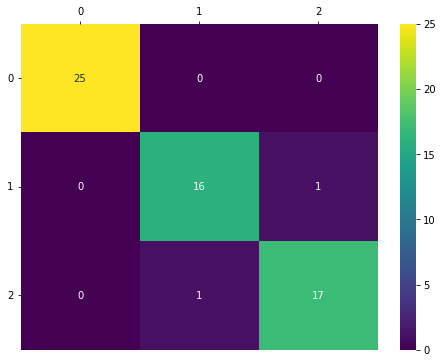

In [29]:
import matplotlib.pyplot as plt
import numpy as np

df_cm = pd.DataFrame(cm, #Valores
                     index = [i for i in np.unique(Y)], # rows
                     columns = [i for i in np.unique(Y)]) # Column
plt.figure(figsize = (8,6))
ax = sns.heatmap(df_cm, annot=True, cmap="viridis")
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.show()

# Resumen

    1.  Dividimos el dataset en features y target
    
    2.  Aplicamos un encoder a la variable objetivo
    
    3.  Separamos nuestro data-set en train y test set
    
    4.  Estandarizamos el set de entrenamiento y sobre lo resultados el set de test. 
    
    5.  Aplicamos un cross validation grid search con kernel linea y gaussiano y diversos parametros sobre el train set
    
    6.  Realizamos la prediccion sobre el test set y obtenemos el score
    
    7.  Realizamos una Matriz de Confusion para obtener una mejor vision del error obtenido

# Extra

Diferencia entre otras funciones con SVM

En el siguiente link https://scikit-learn.org/stable/modules/svm.html#svm-classification encontramos diferentes funciones utilizadas en Sklearn sobre el mismo dataset y los resultados de la clasificacion. 

![Axis diagram](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)
[**Fuente**](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

# Consultas ?

![Meme](https://editor.analyticsvidhya.com/uploads/30927SVM%201.png)
[**Fuente**](https://editor.analyticsvidhya.com/uploads/30927SVM%201.png)